In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
%matplotlib inline

In [56]:
clustered_masks_path = '/home/wences/Documents/GitRepos/SlidingWindowsBudDetection/output/300_150step_04ovlp/clustered_masks/'
prediction_masks_path = '/home/wences/Documents/GitRepos/SlidingWindowsBudDetection/output/300_150step_04ovlp/binary_masks/'
source_images_path = '/home/wences/Documents/corpus-26000/images/'

In [4]:
per_sample_csv = pd.read_csv('metrics_cluster_300_150step_04ovlp_norm.csv')
ground_truth = pd.read_csv('single_instance_dataset_wradius.csv')
test_set_image_list = pd.read_csv('single_instance_test.csv')
test_set_image_list = test_set_image_list['imageOrigin'].values
ground_truth_test = ground_truth.loc[ground_truth['imageOrigin'].isin(test_set_image_list.tolist()), :]

### Breve descripcion de las distancias obtenidas a traves de todos los thresholds

In [5]:
per_sample_csv['true_positive_distance'].describe()

count     128.000000
mean      397.377871
std       513.405737
min         9.963395
25%       120.586753
50%       204.882191
75%       327.168127
max      2162.053504
Name: true_positive_distance, dtype: float64

### Promedio y desviacion estandard de a cada threshold

In [6]:
per_sample_csv['true_positive_distance'].std()

513.4057374342111

In [7]:
per_sample_csv['true_positive_distance'].mean()

397.3778706158644

### Ahora dividamos los resultados en rangos de distancia y veamos cuantos centros de yema caen en cada bolsa. (Veamos que tan dispersas son las predicciones del modelo en cuanto a distancia normalizada)

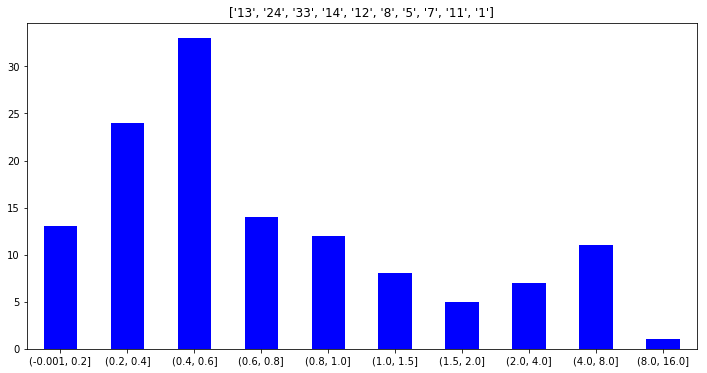

In [8]:
out = pd.cut(per_sample_csv['true_positive_norm_distance'].values, bins=[0,0.2,0.4,0.6,0.8,1,1.5,2,4,8,16], include_lowest=True)
out.value_counts().plot.bar(rot=0, color="b", figsize=(12,6))
plt.title([str(out.value_counts().values[i]) for i in range(out.value_counts().values.shape[0])]);

### Ahora dividamos los resultados en rangos de distancia y veamos cuantos centros de yema caen en cada bolsa. (Veamos que tan dispersas son las predicciones del modelo en cuanto a distancia normalizada)

### Numero de NaNs en el conjunto de testeo, no yema detectada, imagen negra

In [10]:
per_sample_csv.loc[per_sample_csv['buds_predicted'] == 0,:].shape[0]

11

### Numero de clusteres detectados en las mascaras generada

In [12]:
per_sample_csv['buds_predicted'].sum() #140 yemas son las que contiene el test set

302

### Visualizacion de 10 imagenes donde no se pudieron detectar yemas

In [13]:
w=10
h=10
columns = 4
rows = 5

In [14]:
temp = per_sample_csv.loc[per_sample_csv['buds_predicted'] == 0,:]
img_list = temp['mask_name'].values

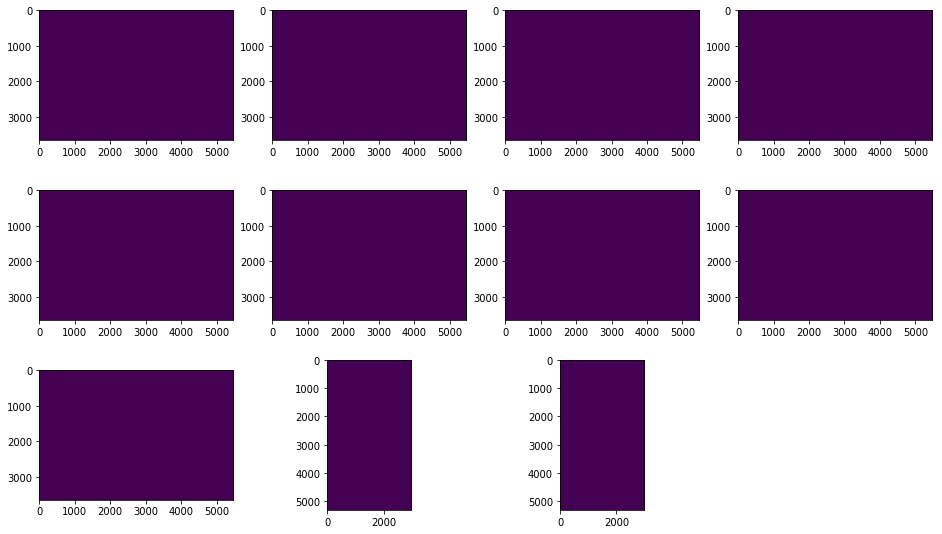

In [34]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, img_list.shape[0]):
    img = cv2.imread(os.path.join(prediction_masks_path,img_list[i]), 0)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

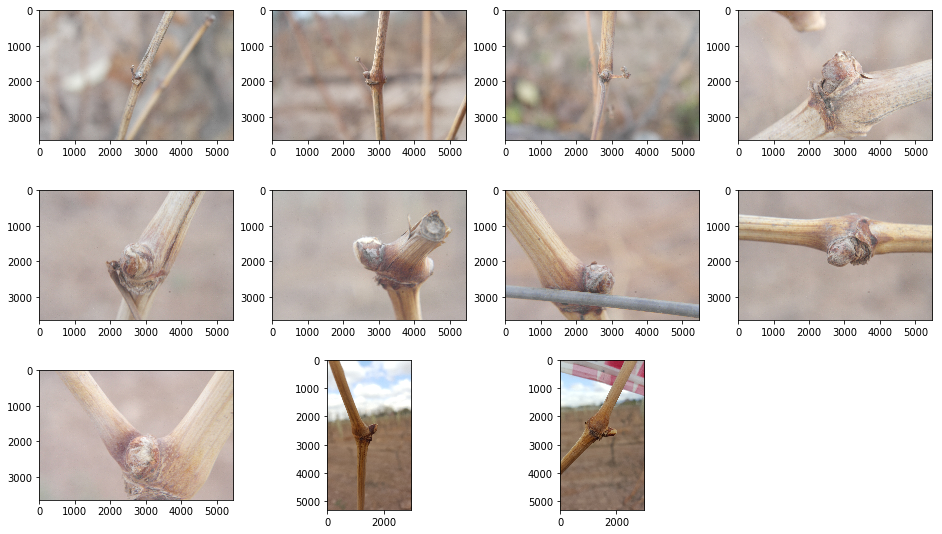

In [31]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, img_list.shape[0]):
    img = cv2.cvtColor(cv2.imread(os.path.join(source_images_path, img_list[i][12:])), cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

### Veamos las escenas donde se detecto solo una yema

In [43]:
temp = per_sample_csv.loc[per_sample_csv['buds_predicted'] == 1,:]
img_list = temp['mask_name'].values

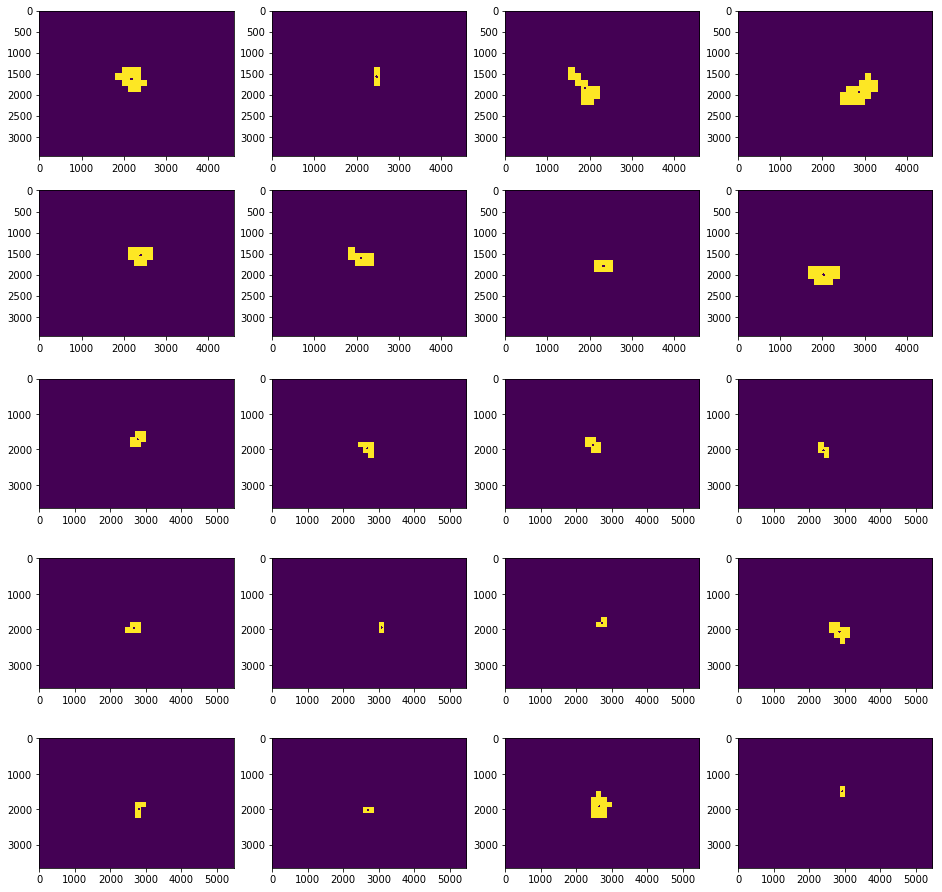

In [38]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    img = cv2.imread(os.path.join(prediction_masks_path,img_list[i]),0)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(cv2.circle(img, center=center, radius=30, color=(0,0,0),thickness=-1))
plt.show()

Distancia en pixeles respecto de los centros gt y de su true positive, arriba de cada imagen 

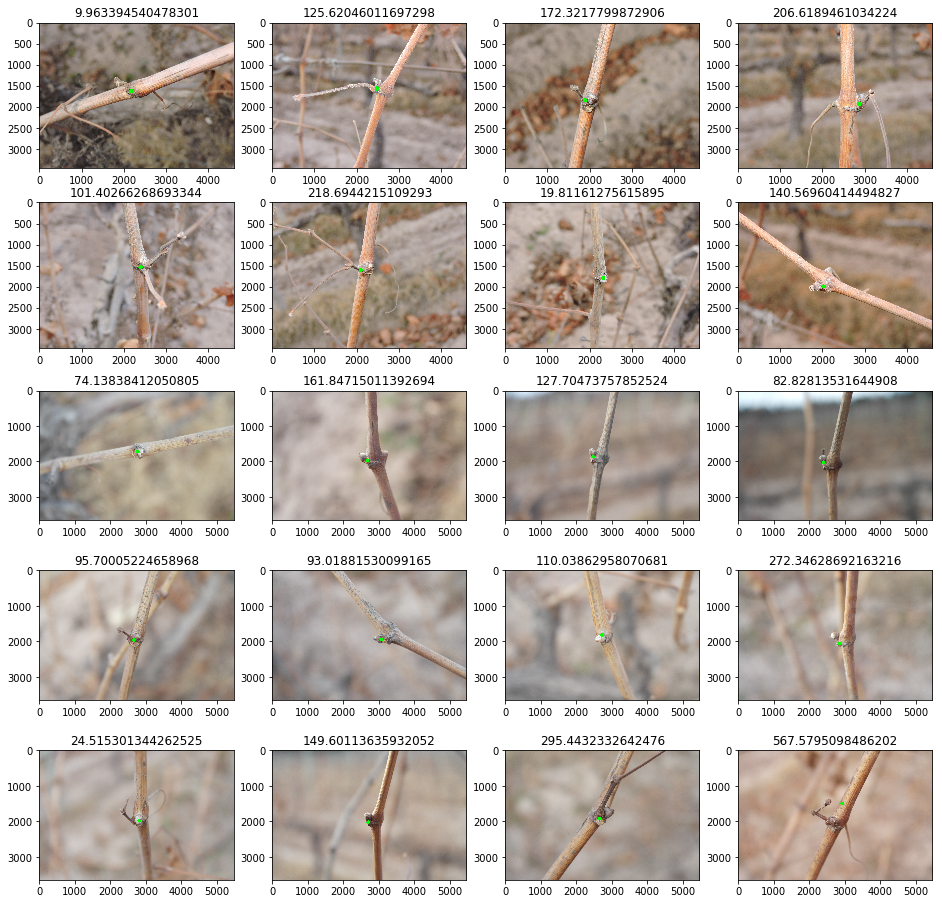

In [46]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    img = cv2.cvtColor(cv2.imread(os.path.join(source_images_path, img_list[i][12:])), cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['true_positive_distance'])
    plt.imshow(cv2.circle(img, center=center, radius=50, color=(0,255,0),thickness=-1))
plt.show()

### Veamos aquellas instancias sobre las que se detectaron varios clusters

In [47]:
temp = per_sample_csv.loc[(per_sample_csv['buds_predicted'] >= 2),:]
img_list = temp['mask_name'].values

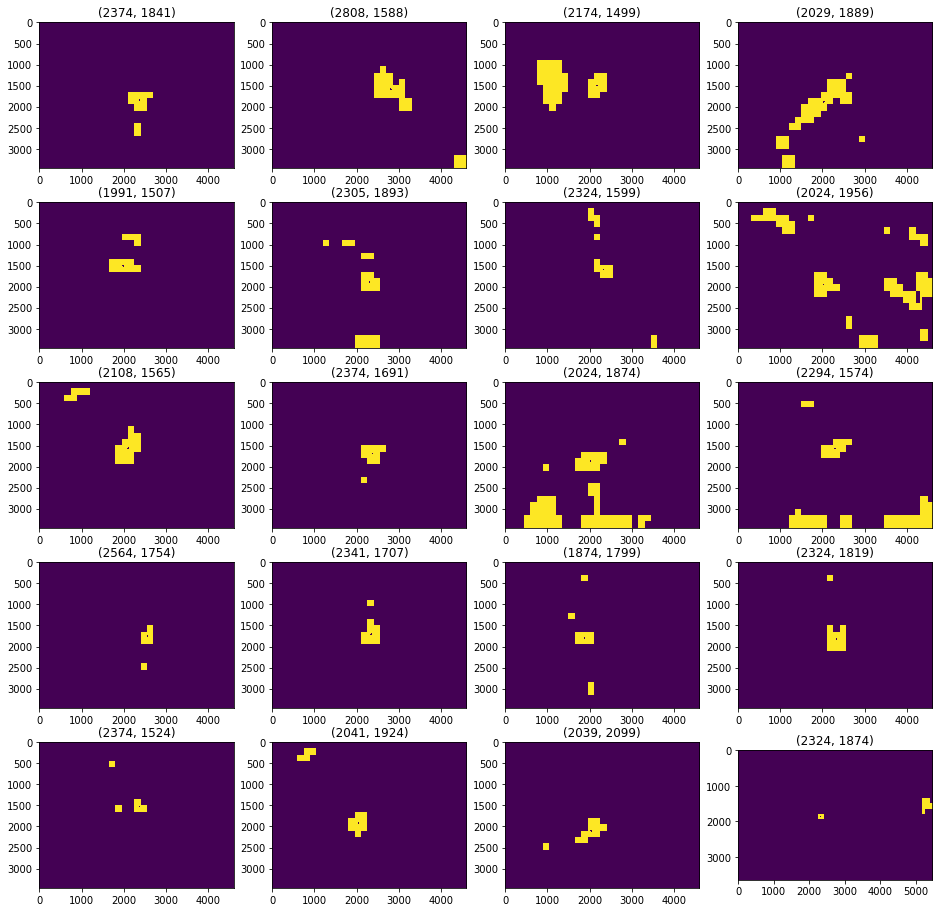

In [48]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    img = cv2.imread(os.path.join(prediction_masks_path,img_list[i]),0)
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    fig.add_subplot(rows, columns, i+1, title=center)
    plt.imshow(cv2.circle(img, center=center, radius=20, color=(0,0,0),thickness=-1))
plt.show()

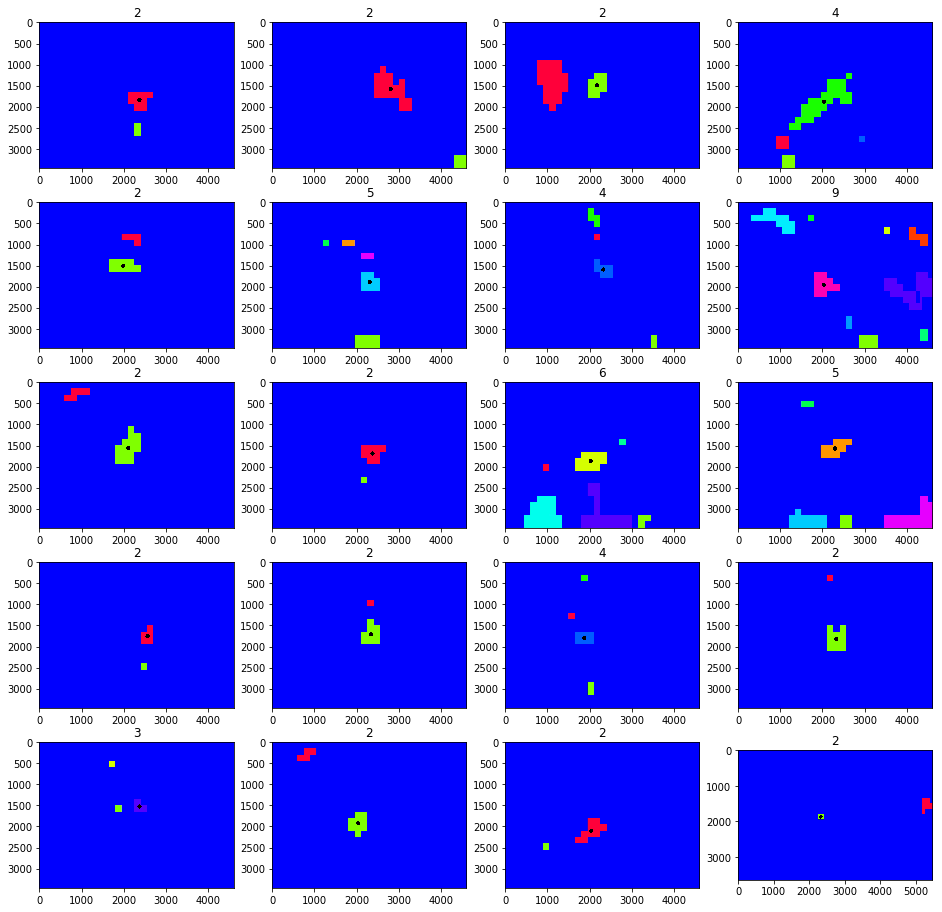

In [58]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    img = cv2.cvtColor(cv2.imread(os.path.join(clustered_masks_path,'cluster_'+img_list[i])), cv2.COLOR_BGR2RGB)
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['buds_predicted'])
    plt.imshow(cv2.circle(img, center=center, radius=50, color=(0,0,0),thickness=-1))
plt.show()

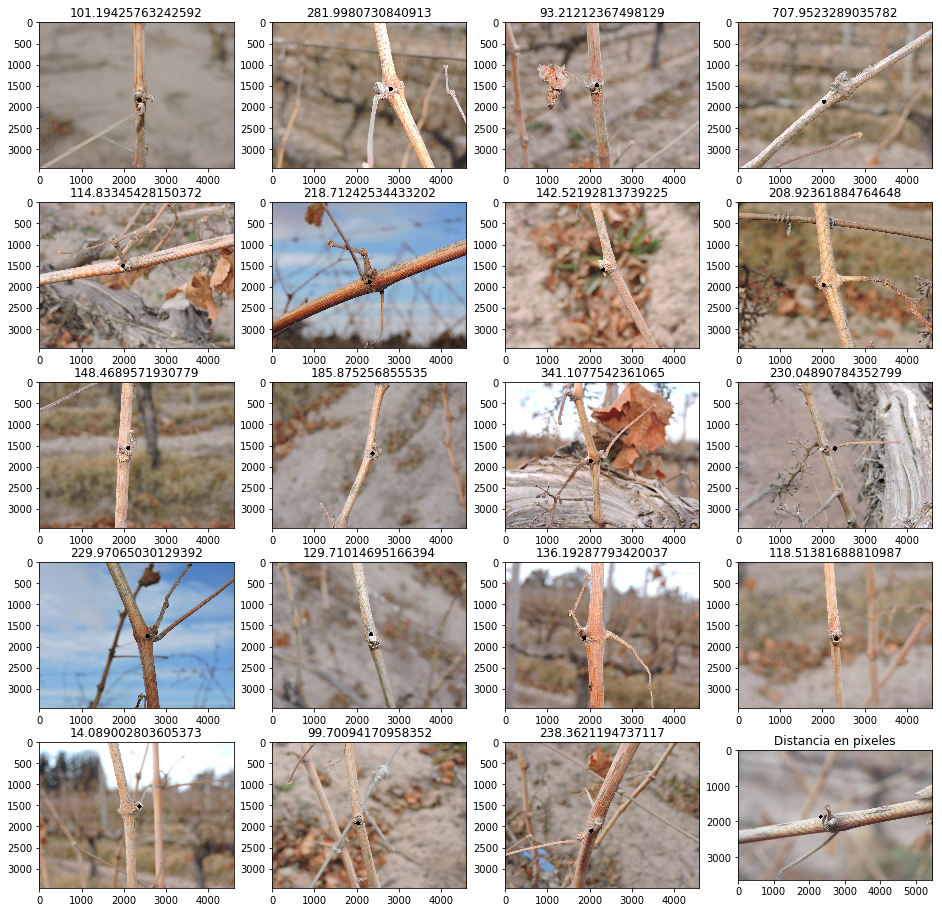

In [59]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    img = cv2.cvtColor(cv2.imread(os.path.join(source_images_path, img_list[i][12:])), cv2.COLOR_BGR2RGB)
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['true_positive_distance'])
    plt.imshow(cv2.circle(img, center=center, radius=50, color=(0,0,0),thickness=-1))
plt.title('Distancia en pixeles')
plt.show()

### Veamos los casos en los que la distancia euclideana normalizada fue mayor a un diametro de yema

In [77]:
temp = per_sample_csv.loc[(per_sample_csv['true_positive_norm_distance'] >= 1),:]
img_list = temp['mask_name'].values
print("Predicciones donde la distancia a ground truth normalizada fue mayor a 1 diametro de yema: "+str(temp.shape[0]))

Predicciones donde la distancia a ground truth normalizada fue mayor a 1 diametro de yema: 32


In [68]:
w=10
h=10
columns = 4
rows = 4

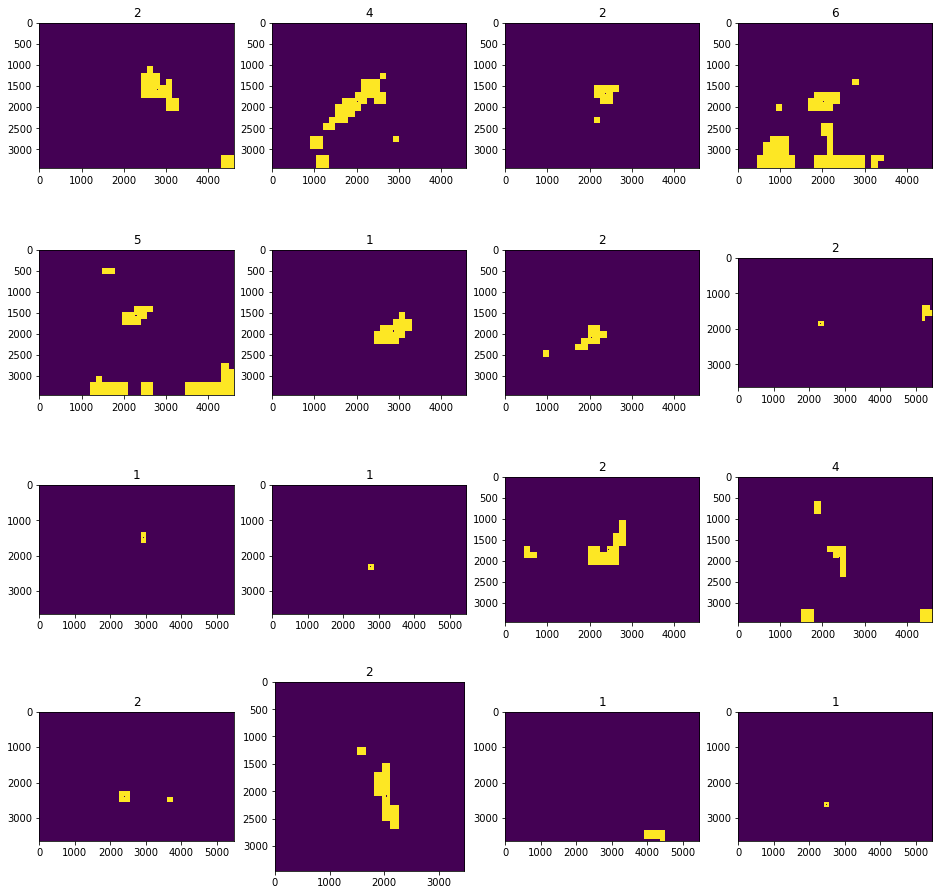

In [69]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    img = cv2.imread(os.path.join(prediction_masks_path,img_list[i]),0)
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['buds_predicted'])
    plt.imshow(cv2.circle(img, center=center, radius=15, color=(0,0,0),thickness=-1))
plt.show()


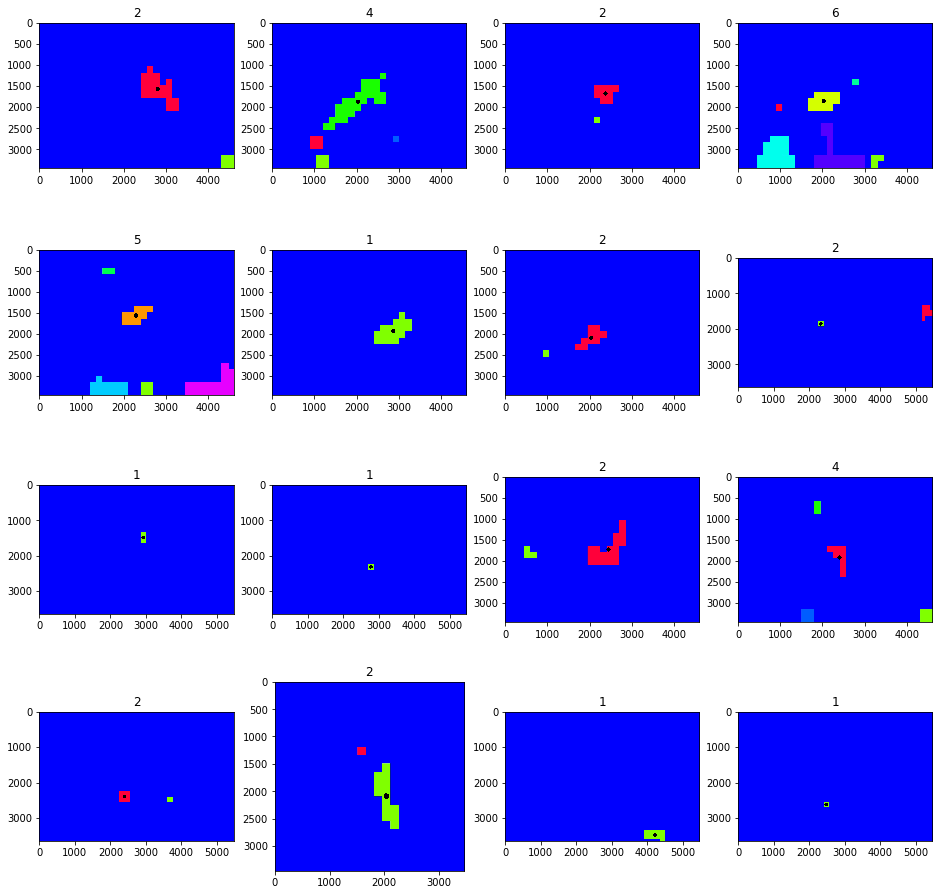

In [78]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    img = cv2.cvtColor(cv2.imread(os.path.join(clustered_masks_path,'cluster_'+img_list[i])), cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['buds_predicted'])
    plt.imshow(cv2.circle(img, center=center, radius=50, color=(0,0,0),thickness=-1))
plt.show()

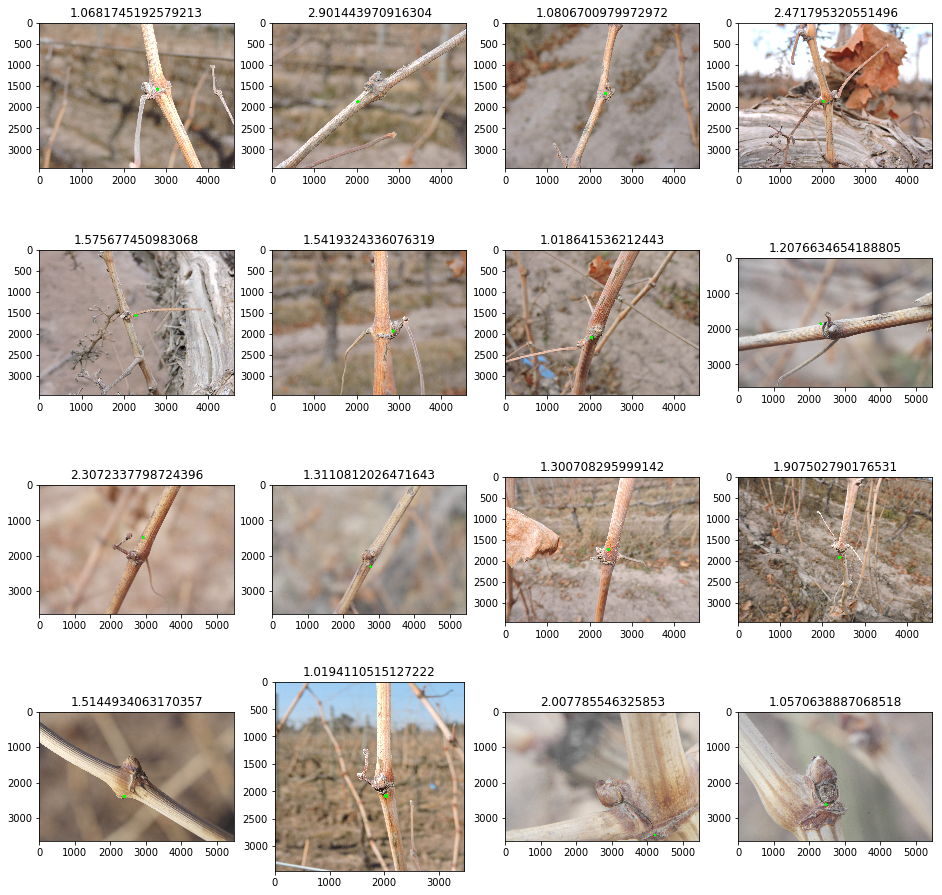

In [80]:
fig=plt.figure(figsize=(16, 16))
for i in range(0, columns*rows):
    img = cv2.cvtColor(cv2.imread(os.path.join(source_images_path, img_list[i][12:])), cv2.COLOR_BGR2RGB)
    center = (int(temp.iloc[i,:]['true_positive_x']), int(temp.iloc[i,:]['true_positive_y']))
    fig.add_subplot(rows, columns, i+1, title=temp.iloc[i,:]['true_positive_norm_distance'])
    plt.imshow(cv2.circle(img, center=center, radius=40, color=(0,255,0),thickness=-1))
plt.show()

### Creo que puede llegar a influir la distancia de la yema en la escena, es decir se comporta mejor para aquellos casos donde la yema es mas grande

### Resultado Precision y Recall  
-  Fijarse de que haya un threshold para true positives en distancia para que no queden clusters malisimos como tp


In [74]:
true_positives = per_sample_csv.loc[per_sample_csv['buds_predicted']>=1,:].shape[0]
false_positives = per_sample_csv['buds_predicted'].sum() - per_sample_csv.loc[per_sample_csv['buds_predicted']>0,:].shape[0]
precision = (true_positives / (true_positives + false_positives))
print('Precision: ' + str(precision))

Precision: 0.423841059602649


In [76]:
true_positives = per_sample_csv.loc[per_sample_csv['buds_predicted']>=1,:].shape[0]
false_negatives = per_sample_csv.loc[per_sample_csv['buds_predicted']==0,:].shape[0] # aquellos en los que no se predijeron ninguna
recall = (true_positives / (true_positives + false_negatives))
print('Recall: ' + str(recall))

Recall: 0.920863309352518
